## Setup and Define Functions

In [1]:
# import all
import numpy as np
import xarray as xr

#from rhwhitepackages.regrid import *

import mpl_toolkits
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.path as mpath
import matplotlib.ticker as mticker

# plotting
# import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
from cartopy.util import add_cyclic_point
import matplotlib.image as image

%matplotlib inline


# resize plots
matplotlib.rcParams['figure.figsize']=(20,5)
matplotlib.rcParams.update({'font.size':14})

In [2]:
# Read in elevation data
#elevdata = np.genfromtxt('/home/disk/eos4/rachel/data/distance_elevation-data.txt',delimiter=',',skip_header=1)
elevdata = np.genfromtxt('/home/disk/eos4/rachel/data/distance_elevation-data_neat1.csv',delimiter=',',skip_header=1)

lons = elevdata[:,1]
lats = elevdata[:,2]

elev = elevdata[:,3]
distance = elevdata[:,4]


print(distance)

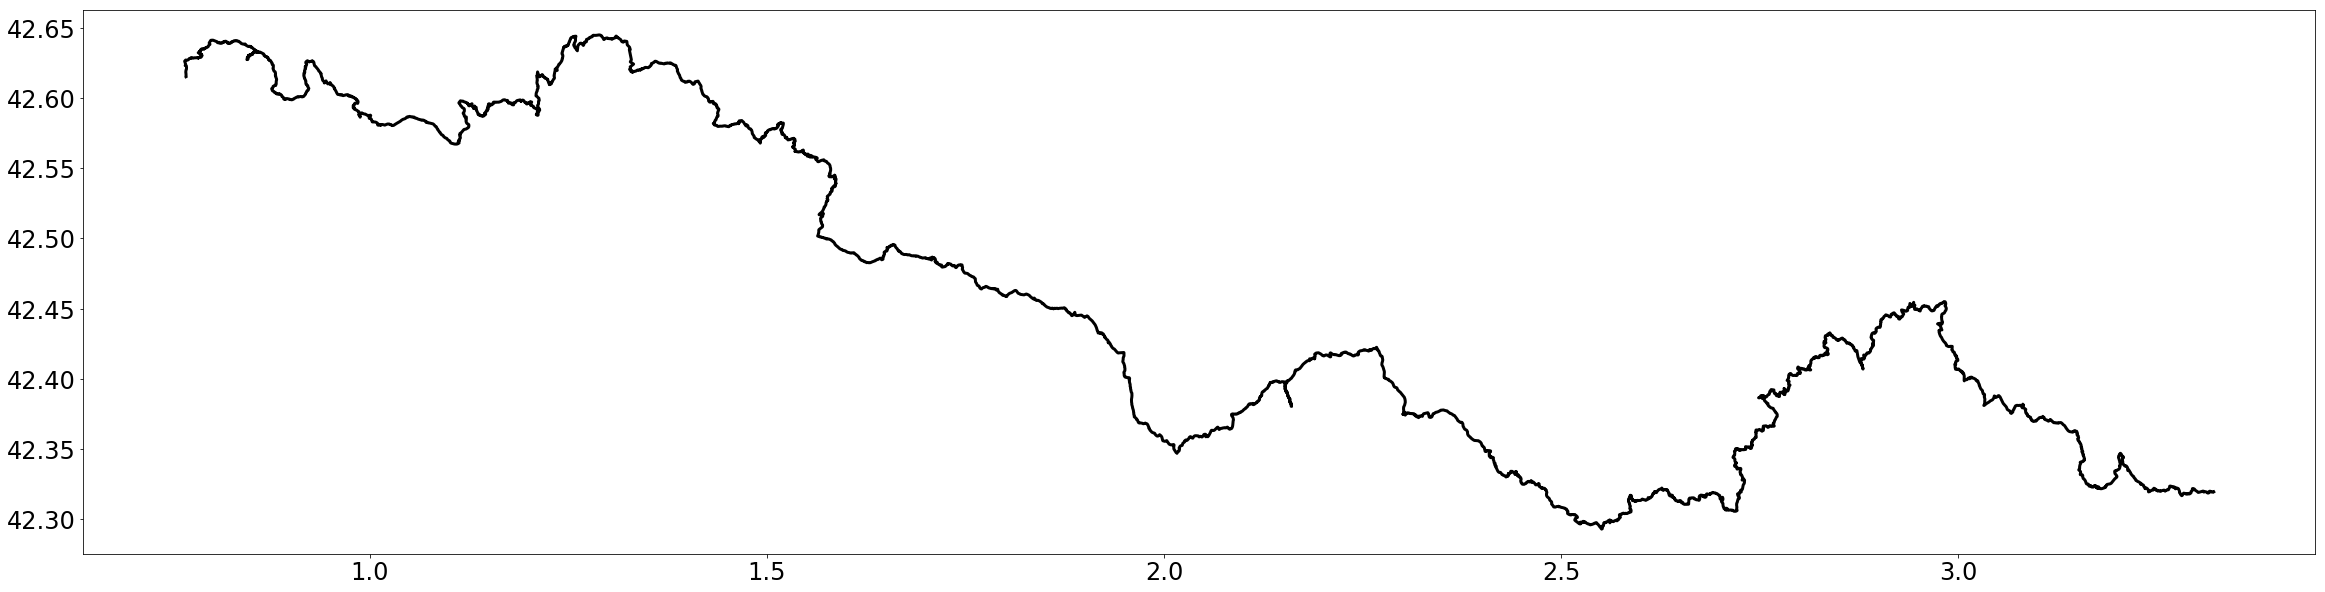

In [4]:
# Plot route to check
matplotlib.rcParams['figure.figsize']=(40,10)
matplotlib.rcParams.update({'font.size':24})

plt.plot(lats, lons,color='k',linewidth=3)


In [5]:
def plot_colourline(x,y,c,w=4):
    c = plt.cm.gist_earth((c-(np.min(c)*0.7))/((np.max(c)*1.2)-(np.min(c)*0.7)))
    ax = plt.gca()
    for i in np.arange(len(x)-1):
        ax.plot([x[i],x[i+1]], [y[i],y[i+1]], c=c[i],linewidth=w)
    return

In [6]:
print('thing')

thing


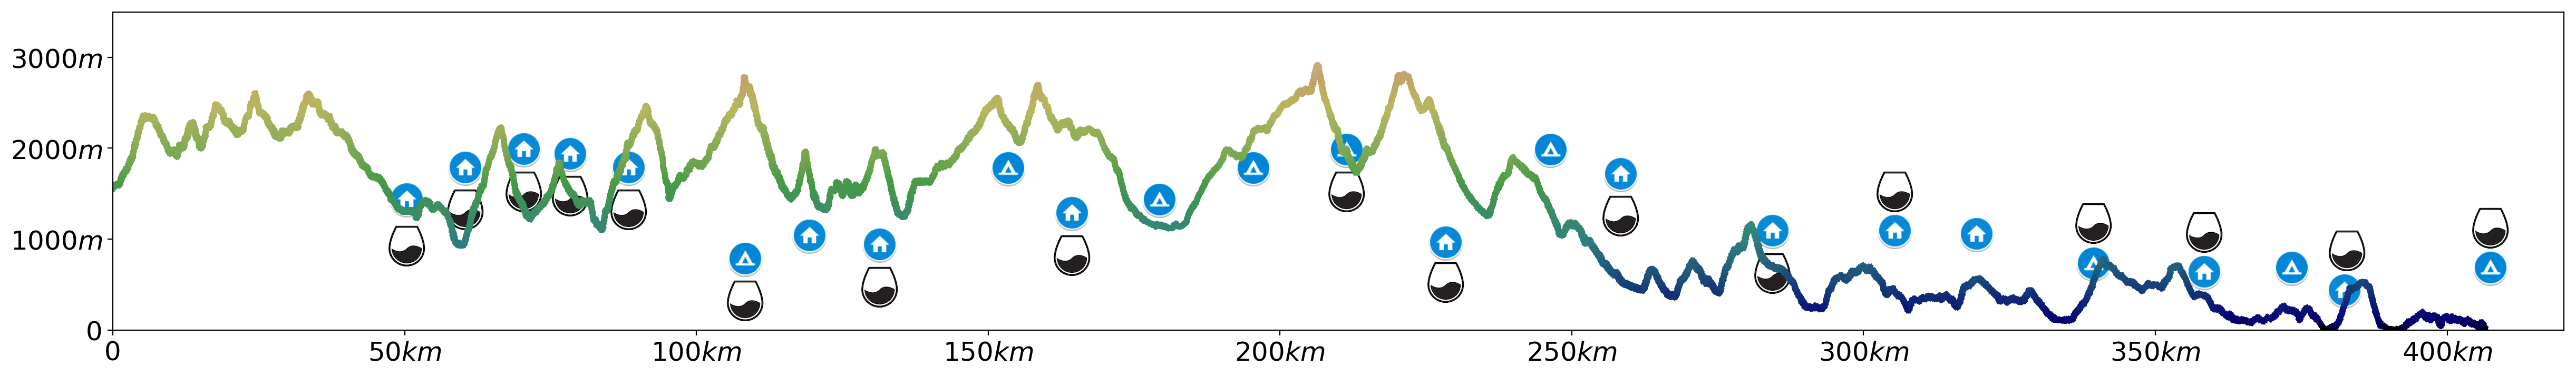

In [170]:
# plot 
plottents=True
plothuts=True
plotwine=True

matplotlib.rcParams['figure.figsize']=(30,4) #(40,4)
matplotlib.rcParams.update({'font.size':18})

dpi=200

fig = plt.figure(dpi=dpi)
ax = fig.add_subplot(111)

colors = plt.cm.terrain(np.linspace(0,1,200))

#plt.plot(distance, elev,color='k',linewidth=4)

plot_colourline(distance,elev,elev,4)

plt.xlim(0,420)
plt.ylim(0,3500)

plt.xticks([0,50,100,150,200,250,300,350,400],
           [r'0',r'$50km$',r'$100km$',r'$150km$',r'$200km$',r'$250km$',r'$300km$',r'$350km$',r'$400km$'])
plt.yticks([0,1000,2000,3000],
           [r'0',r'$1000m$',r'$2000m$',r'$3000m$'])

xshift = 49
yshift = 50
# Plot wine glasses
if plotwine:
    im = image.imread('/home/disk/eos4/rachel/data/WineGlass2.png')
    imageSize = im.shape[1], im.shape[0]

    # plot our line with transparent markers, and markersize the size of our image
    line, = ax.plot((-47+xshift,-37+xshift,-27+xshift,-19+xshift,-9+xshift,11+xshift,34+xshift,67+xshift,114+xshift,
                     131+xshift,161+xshift,187+xshift,208+xshift,242+xshift,261+xshift,285.5+xshift,
                     310+xshift,330.5+xshift,342.5+xshift),
                    (800+yshift,1200+yshift,1400+yshift,1350+yshift,1200+yshift,200+yshift,350+yshift,700+yshift,
                     1400+yshift,400+yshift,1130+yshift,500+yshift,1400+yshift,1050+yshift,950+yshift,750+yshift,
                     1000+yshift,750+yshift,260+yshift),
                    "bo",mfc="None",mec="None",markersize= 2000) #imageSize[0] * (dpi/ 2))
    # we need to make the frame transparent so the image can be seen; only in trunk can you put the image on top of the plot, see this link:
    # http://www.mail-archive.com/matplotlib-users@lists.sourceforge.net/msg14534.html
    ax.patch.set_alpha(0)

    # translate point positions to pixel positions; figimage needs pixels not points
    line._transform_path()
    path, affine = line._transformed_path.get_transformed_points_and_affine()
    path = affine.transform_path(path)
    for pixelPoint in path.vertices:
        # place image at point, centering it
        fig.figimage(im,pixelPoint[0]-imageSize[0]/2,pixelPoint[1]-imageSize[1]/2,origin="upper")

# Plot tents 
if plottents:
    im = image.imread('/home/disk/eos4/rachel/data/Tent_icon.png')
    imageSize = im.shape[1], im.shape[0]

    # plot our line with transparent markers, and markersize the size of our image
    line, = ax.plot((11+xshift,56+xshift,82+xshift,98+xshift,114+xshift,149+xshift,242+xshift,276+xshift,
                     310+xshift,352+xshift),
                    (650+yshift,1650+yshift,1300+yshift,1650+yshift,1850+yshift,1850+yshift,600+yshift,
                     550+yshift,550+yshift,300+yshift),"bo",mfc="None",mec="None",markersize= 2000) #imageSize[0] * (dpi/ 2))
    # we need to make the frame transparent so the image can be seen only in trunk can you put the image on top of the plot, see this link:
    ax.patch.set_alpha(0)

    # translate point positions to pixel positions; figimage needs pixels not points
    line._transform_path()
    path, affine = line._transformed_path.get_transformed_points_and_affine()
    path = affine.transform_path(path)
    for pixelPoint in path.vertices:
        # place image at point, centering it
        fig.figimage(im,pixelPoint[0]-imageSize[0]/2,pixelPoint[1]-imageSize[1]/2,origin="upper")

# Plot huts 
if plothuts:
    im = image.imread('/home/disk/eos4/rachel/data/Hut_icon.png')
    imageSize = im.shape[1], im.shape[0]

    # plot our line with transparent markers, and markersize the size of our image
    line, = ax.plot((-47+xshift,-37+xshift,-27+xshift,-19+xshift,-9+xshift,22+xshift,34+xshift,67+xshift,
                     131+xshift,161+xshift,187+xshift,208+xshift,222+xshift,261+xshift,285+xshift,330+xshift),
                    (1300+yshift,1650+yshift,1850+yshift,1800+yshift,1650+yshift,900+yshift,800+yshift,1150+yshift,
                     825+yshift,1580+yshift,950+yshift,950+yshift,920+yshift,500+yshift,300+yshift,300+yshift),
                    "bo",mfc="None",mec="None",markersize= 2000) #imageSize[0] * (dpi/ 2))
    # we need to make the frame transparent so the image can be seen only in trunk can you put the image on top of the plot, see this link:
    ax.patch.set_alpha(0)

    # translate point positions to pixel positions; figimage needs pixels not points
    line._transform_path()
    path, affine = line._transformed_path.get_transformed_points_and_affine()
    path = affine.transform_path(path)
    for pixelPoint in path.vertices:
        # place image at point, centering it
        fig.figimage(im,pixelPoint[0]-imageSize[0]/2,pixelPoint[1]-imageSize[1]/2,origin="upper",alpha=10)

# Plot cava bottle
if plotwine:
    im = image.imread('/home/disk/eos4/rachel/data/Cava_colour2.png')
    imageSize = im.shape[1], im.shape[0]

    # plot our line with transparent markers, and markersize the size of our image
    line, = ax.plot((365+xshift),
                    (800+yshift),
                    "bo",mfc="None",mec="None",markersize= 2000) #imageSize[0] * (dpi/ 2))
    # we need to make the frame transparent so the image can be seen; only in trunk can you put the image on top of the plot, see this link:
    # http://www.mail-archive.com/matplotlib-users@lists.sourceforge.net/msg14534.html
    ax.patch.set_alpha(0)

    # translate point positions to pixel positions; figimage needs pixels not points
    line._transform_path()
    path, affine = line._transformed_path.get_transformed_points_and_affine()
    path = affine.transform_path(path)
    for pixelPoint in path.vertices:
        # place image at point, centering it
        fig.figimage(im,pixelPoint[0]-imageSize[0]/2,pixelPoint[1]-imageSize[1]/2,origin="upper")
        
        
plt.savefig('/home/disk/eos4/rachel/data/elevation_wine2.png', dpi=200, facecolor='w', edgecolor='w')
        #orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, pad_inches=0.1,frameon=None, metadata=None)

plt.savefig('/home/disk/eos4/rachel/data/elevation_wine2.jpg', dpi=200, facecolor='w', edgecolor='w')
        #orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, pad_inches=0.1,frameon=None, metadata=None)

plt.show()

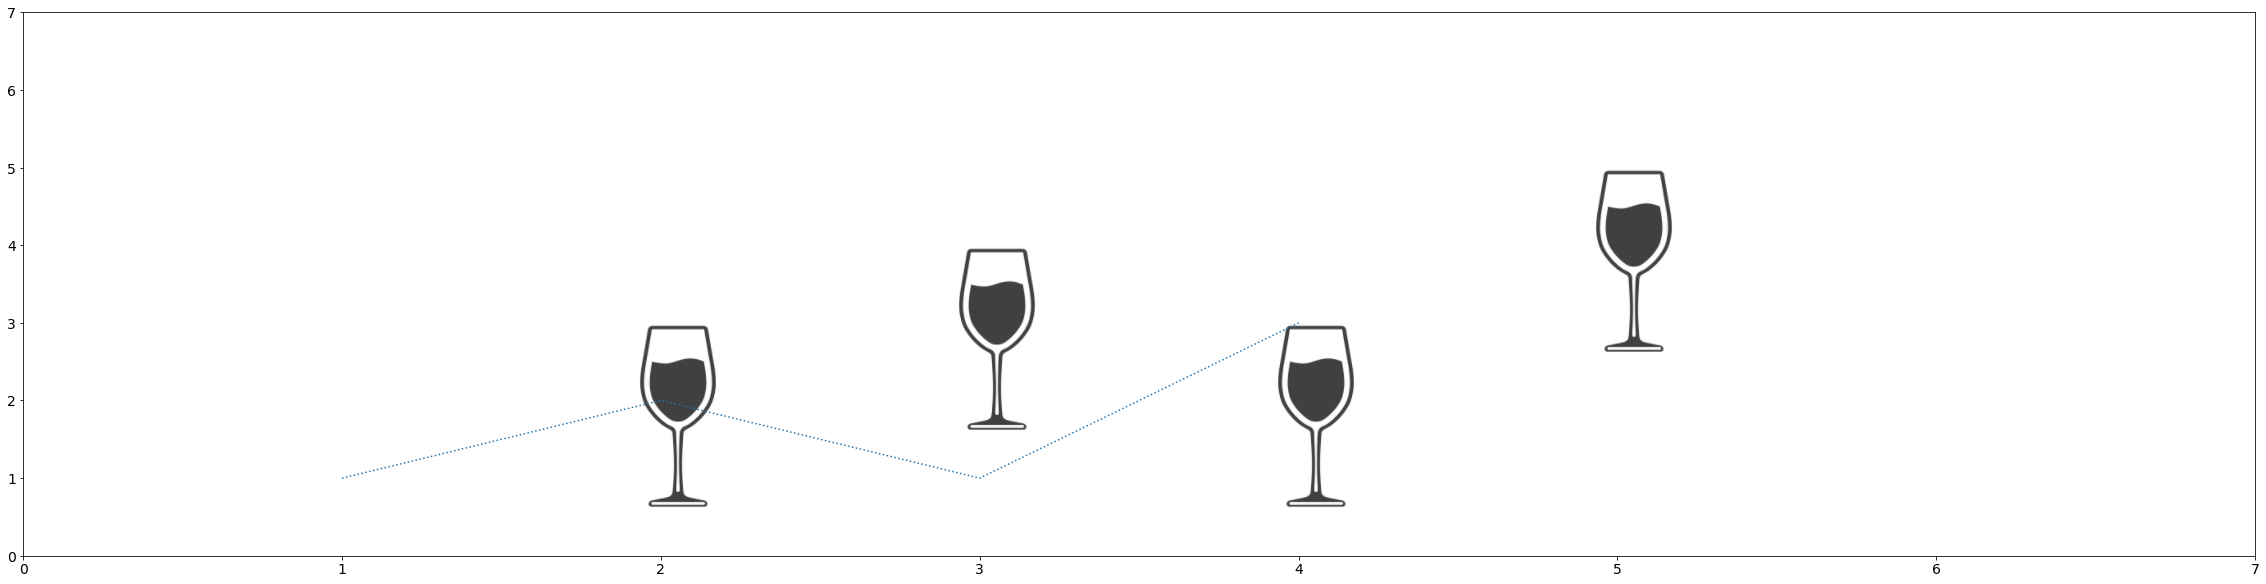

In [21]:
# Test wine glasses!
matplotlib.rcParams['figure.figsize']=(40,10)
matplotlib.rcParams.update({'font.size':14})

# constant
dpi = 72
# read in our png file
#im = image.imread('/home/disk/eos4/rachel/data/red-wine-glass-icon.png',0)

im = image.imread('/home/disk/eos4/rachel/data/wine_glass_wb.png')
imageSize = im.shape[1], im.shape[0]

fig = plt.figure(dpi=dpi)
ax = fig.add_subplot(111)
# plot our line with transparent markers, and markersize the size of our image
line, = ax.plot((1,2,3,4),(1,2,1,3),linestyle=':')

line, = ax.plot((1,2,3,4),(1,2,1,3),"bo",mfc="None",mec="None",markersize=imageSize[0] * (dpi/ 96))
# we need to make the frame transparent so the image can be seen
# only in trunk can you put the image on top of the plot, see this link:
# http://www.mail-archive.com/matplotlib-users@lists.sourceforge.net/msg14534.html
ax.patch.set_alpha(0)
ax.set_xlim((0,7))
ax.set_ylim((0,7))

# translate point positions to pixel positions
# figimage needs pixels not points
line._transform_path()
path, affine = line._transformed_path.get_transformed_points_and_affine()
path = affine.transform_path(path)
for pixelPoint in path.vertices:
    # place image at point, centering it
    fig.figimage(im,pixelPoint[0]-imageSize[0]/2,pixelPoint[1]-imageSize[1]/2,origin="upper")


plt.show()

In [ ]:
cmap_def,cmap_wc,cmap_reds = get_colormaps()

In [2]:
# Define new colormap
reds = np.array([  10, 15, 30, 60, 80,130,160,200,230,245,255,255,255,255,255,255,255,192,165],np.float)
greens = np.array([50, 75,110,160,180,210,240,250,255,245,250,232,192,160, 96, 50, 20,  0,  0],np.float)
blues = np.array([120,165,200,240,250,255,255,255,255,245,220,120, 60,  0,  0,  0,  0,  0,  0],np.float)

reds = reds/255
blues = blues/255
greens = greens/255

ncolors = len(reds)

spacing = np.linspace(0,1,ncolors)
cdict = {'red': ((spacing[0], reds[0], reds[0]),
                 (spacing[1], reds[1], reds[1]),
                 (spacing[2], reds[2], reds[2]),
                 (spacing[3], reds[3], reds[3]),
                 (spacing[4], reds[4], reds[4]),
                 (spacing[5], reds[5], reds[5]),
                 (spacing[6], reds[6], reds[6]),
                 (spacing[7], reds[7], reds[7]),
                 (spacing[8], reds[8], reds[8]),
                 (spacing[9], reds[9], reds[9]),
                 (spacing[10], reds[10], reds[10]),
                 (spacing[11], reds[11], reds[11]),
                 (spacing[12], reds[12], reds[12]),
                 (spacing[13], reds[13], reds[13]),
                 (spacing[14], reds[14], reds[14]),
                 (spacing[15], reds[15], reds[15]),
                 (spacing[16], reds[16], reds[16]),
                 (spacing[17], reds[17], reds[17]),
                 (spacing[18], reds[18], reds[18])
                ),
         'green': ((spacing[0], greens[0], greens[0]),
                 (spacing[1], greens[1], greens[1]),
                 (spacing[2], greens[2], greens[2]),
                 (spacing[3], greens[3], greens[3]),
                 (spacing[4], greens[4], greens[4]),
                 (spacing[5], greens[5], greens[5]),
                 (spacing[6], greens[6], greens[6]),
                 (spacing[7], greens[7], greens[7]),
                 (spacing[8], greens[8], greens[8]),
                 (spacing[9], greens[9], greens[9]),
                 (spacing[10], greens[10], greens[10]),
                 (spacing[11], greens[11], greens[11]),
                 (spacing[12], greens[12], greens[12]),
                 (spacing[13], greens[13], greens[13]),
                 (spacing[14], greens[14], greens[14]),
                 (spacing[15], greens[15], greens[15]),
                 (spacing[16], greens[16], greens[16]),
                 (spacing[17], greens[17], greens[17]),
                 (spacing[18], greens[18], greens[18])
                 ),
                   
         'blue': ((spacing[0], blues[0], blues[0]),
                 (spacing[1], blues[1], blues[1]),
                 (spacing[2], blues[2], blues[2]),
                 (spacing[3], blues[3], blues[3]),
                 (spacing[4], blues[4], blues[4]),
                 (spacing[5], blues[5], blues[5]),
                 (spacing[6], blues[6], blues[6]),
                 (spacing[7], blues[7], blues[7]),
                 (spacing[8], blues[8], blues[8]),
                 (spacing[9], blues[9], blues[9]),
                 (spacing[10], blues[10], blues[10]),
                 (spacing[11], blues[11], blues[11]),
                 (spacing[12], blues[12], blues[12]),
                 (spacing[13], blues[13], blues[13]),
                 (spacing[14], blues[14], blues[14]),
                 (spacing[15], blues[15], blues[15]),
                 (spacing[16], blues[16], blues[16]),
                 (spacing[17], blues[17], blues[17]),
                 (spacing[18], blues[18], blues[18]) 
                 )}

my_cmap = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)

In [3]:
# Define new colormap
reds = np.array([ 245,255,255,255,255,255,255,255,192,165],np.float)
greens = np.array([245,250,232,192,160,96,50,20,0,0],np.float)
blues = np.array([245,220,120,60,0,0,0,0,0,0],np.float)

reds = reds/255
blues = blues/255
greens = greens/255

ncolors = len(reds)

spacing = np.linspace(0,1,ncolors)
cdict = {'red': ((spacing[0], reds[0], reds[0]),
                 (spacing[1], reds[1], reds[1]),
                 (spacing[2], reds[2], reds[2]),
                 (spacing[3], reds[3], reds[3]),
                 (spacing[4], reds[4], reds[4]),
                 (spacing[5], reds[5], reds[5]),
                 (spacing[6], reds[6], reds[6]),
                 (spacing[7], reds[7], reds[7]),
                 (spacing[8], reds[8], reds[8]),
                 (spacing[9], reds[9], reds[9])
                ),
         'green': ((spacing[0], greens[0], greens[0]),
                 (spacing[1], greens[1], greens[1]),
                 (spacing[2], greens[2], greens[2]),
                 (spacing[3], greens[3], greens[3]),
                 (spacing[4], greens[4], greens[4]),
                 (spacing[5], greens[5], greens[5]),
                 (spacing[6], greens[6], greens[6]),
                 (spacing[7], greens[7], greens[7]),
                 (spacing[8], greens[8], greens[8]),
                 (spacing[9], greens[9], greens[9])
                 ),
                   
         'blue': ((spacing[0], blues[0], blues[0]),
                 (spacing[1], blues[1], blues[1]),
                 (spacing[2], blues[2], blues[2]),
                 (spacing[3], blues[3], blues[3]),
                 (spacing[4], blues[4], blues[4]),
                 (spacing[5], blues[5], blues[5]),
                 (spacing[6], blues[6], blues[6]),
                 (spacing[7], blues[7], blues[7]),
                 (spacing[8], blues[8], blues[8]),
                 (spacing[9], blues[9], blues[9]) 
                 )}

my_cmap_reds = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)

In [1]:
def addarrows(varCTL1,varCTL2,var1,var2,arrowscale,unit,scale=0.2):
    m = 5; n = 5 # plot every 5th lon and lat
    diffs1 = varCTL1.values - var1.values
    diffs2 = varCTL2.values - var2.values
 
    drawmap()
    quiv = plt.quiver(var1.lon[::m], var1.lat[::n],
                      diffs1[::m,::n], diffs2[::m,::n],
                      color='k', 
                      headlength=5,
                      headwidth=3,
                      scale=arrowscale,
                      width=0.001,
                      pivot='middle'
                    )
    plt.quiverkey(quiv, X=0.9, Y=1.03, U=scale/10.0,
             label=r'$' + str(scale/10.0) + unit + '$', labelpos='E') 

In [4]:
# Define constants (these are not actually needed for this notebook)
plevs = [925,850,500,250,200,10]
years = np.array([0,25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500],np.int)
days = np.multiply(years,365)

constP = 1000.0*(60*60*24) # convert from m/s to mm/day
constE = (1000.0 * 60.0*60.0*24.0)/(1000.0*2400.0 * 1023.0) # convert from W/m2 to mm/day
constH = 0.01 # Convert from cm to m


In [5]:
# map functions
def set_proj(projection,nrows,ncols,n):
    if projection == 'Ortho':
        proj=ccrs.Orthographic(central_latitude=90)
    elif projection == 'Mollweide':
        proj=ccrs.Mollweide(central_longitude=0)
    elif projection == 'NorthPole':
        proj=ccrs.NorthPolarStereo()
    elif projection == 'PlateCarree':
        proj=ccrs.PlateCarree()
    elif projection == 'Robinson':
        proj=ccrs.Robinson()
        

    ax = plt.subplot(ncols,nrows,n,projection=proj)
    # Draw land map
    ax.coastlines()
    # draw gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree())
    
    if projection == 'PlateCarree':
    # Define where gridlines are
        ax.set_xticks([-180,-150,-120,-90,-60,-30,0, 30,60,90, 120,150, 180], crs=ccrs.PlateCarree())
        ax.set_yticks([-90, -60,-30, 0, 30,60,90], crs=ccrs.PlateCarree())


    return(ax)

def plot_map(proj,toplot,levels,n,nrows,ncols):
    
    ax = set_proj(proj,ncols,nrows,n)
    
    # Add cyclic point so there isn't a gap in the data.
    coord = 'lon'
    coordlat = 'lat'
    try:
        lon_idx = toplot.dims.index(coord)
    except ValueError:
        coord = 'longitude'
        coordlat = 'latitude'
        lon_idx = toplot.dims.index(coord)
        
    cyclic_data, cyclic_coord = add_cyclic_point(toplot.values,
                                                 coord=toplot.coords[coord],
                                                 axis=lon_idx)
    
    # Copy and add the cyclic coordinate and data
    new_coords = dict(toplot.coords)
    new_coords[coord] = cyclic_coord
    new_values = cyclic_data

    new_da = xr.DataArray(new_values, dims=toplot.dims, coords=new_coords)

    # Plot the field                         
    cp = plt.contourf(new_da[coord],new_da[coordlat],new_da.values,levels=levels,extend='both',
                      transform=ccrs.PlateCarree(),cmap=my_cmap)
    # Add colorbar
    cb = plt.colorbar(cp)

def plot_test(proj,nrows,ncols):
    # define which season ('ann','DJF','JJA' etc)
    seas = 'ANN'
    
    # define which variables to plot: varplot1 is left column, varplot2 is right column
    varplot1 = 'skt'
    varplot2 = 'msl'

    # set contour levels for coloured contours
    levels0= np.arange(-30,30) #[-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19]

    levels1 = np.arange(-40,40) 

    levels0p= np.arange(1000,1024,0.5) #[-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19]

    levels1p= np.arange(-19,19,2) 

    n=1
    # Plot ERA-I
    toplot = atmclim['ERAI'][seas][varplot1].mean(dim='time')  - 273.15
    plot_map(proj,toplot,levels0,n,nrows,ncols); n+=1

    plt.title('ERAI, TS, ' + seas,loc='left')
    
    toplot = atmclim['ERAI'][seas][varplot2].mean(dim='time')/100.0
    plot_map(proj,toplot,levels0p,n,nrows,ncols); n+=1

    plt.title('ERAI, PSL, ' + seas,loc='left')

    
    # Plot ERA-I JJA - DJF
    seas1 = 'JJA'
    seas2 = 'DJF'
    toplot = (atmclim['ERAI'][seas1][varplot1].mean(dim='time') - 
              atmclim['ERAI'][seas2][varplot1].mean(dim='time'))
    plot_map(proj,toplot,levels1,n,nrows,ncols); n+=1

    plt.title('ERAI, TS, ' + seas1 + '-' + seas2,loc='center')
    
    toplot = (atmclim['ERAI'][seas1][varplot2].mean(dim='time')/100.0 - 
              atmclim['ERAI'][seas2][varplot2].mean(dim='time')/100.0)
    plot_map(proj,toplot,levels1p,n,nrows,ncols); n+=1

    plt.title('ERAI, PSL, ' + seas1 + '-' + seas2,loc='right')    

In [ ]:
def find_side(ls, side):
    """
    Given a shapely LineString which is assumed to be rectangular, return the
    line corresponding to a given side of the rectangle.
    
    """
    minx, miny, maxx, maxy = ls.bounds
    points = {'left': [(minx, miny), (minx, maxy)],
              'right': [(maxx, miny), (maxx, maxy)],
              'bottom': [(minx, miny), (maxx, miny)],
              'top': [(minx, maxy), (maxx, maxy)],}
    return sgeom.LineString(points[side])


def lambert_xticks(ax, ticks):
    """Draw ticks on the bottom x-axis of a Lambert Conformal projection."""
    te = lambda xy: xy[0]
    lc = lambda t, n, b: np.vstack((np.zeros(n) + t, np.linspace(b[2], b[3], n))).T
    xticks, xticklabels = _lambert_ticks(ax, ticks, 'bottom', lc, te)
    ax.xaxis.tick_bottom()
    ax.set_xticks(xticks)
    ax.set_xticklabels([ax.xaxis.get_major_formatter()(xtick) for xtick in xticklabels])
    

def lambert_yticks(ax, ticks):
    """Draw ricks on the left y-axis of a Lamber Conformal projection."""
    te = lambda xy: xy[1]
    lc = lambda t, n, b: np.vstack((np.linspace(b[0], b[1], n), np.zeros(n) + t)).T
    yticks, yticklabels = _lambert_ticks(ax, ticks, 'left', lc, te)
    ax.yaxis.tick_left()
    ax.set_yticks(yticks)
    ax.set_yticklabels([ax.yaxis.get_major_formatter()(ytick) for ytick in yticklabels])

def _lambert_ticks(ax, ticks, tick_location, line_constructor, tick_extractor):
    """Get the tick locations and labels for an axis of a Lambert Conformal projection."""
    outline_patch = sgeom.LineString(ax.outline_patch.get_path().vertices.tolist())
    axis = find_side(outline_patch, tick_location)
    n_steps = 30
    extent = ax.get_extent(ccrs.PlateCarree())
    _ticks = []
    for t in ticks:
        xy = line_constructor(t, n_steps, extent)
        proj_xyz = ax.projection.transform_points(ccrs.Geodetic(), xy[:, 0], xy[:, 1])
        xyt = proj_xyz[..., :2]
        ls = sgeom.LineString(xyt.tolist())
        locs = axis.intersection(ls)
        if not locs:
            tick = [None]
        else:
            tick = tick_extractor(locs.xy)
        _ticks.append(tick[0])
    # Remove ticks that aren't visible:    
    ticklabels = copy(ticks)
    while True:
        try:
            index = _ticks.index(None)
        except ValueError:
            break
        _ticks.pop(index)
        ticklabels.pop(index)
    return _ticks, ticklabels


def set_LambertCanada_ticks(nrows,ncols,n):

    # Create a Lambert Conformal projection:
    proj = ccrs.LambertConformal(central_longitude=-120.0, central_latitude=47.5,
                             false_easting=400000, false_northing=400000,
                             standard_parallels=(46, 49))

    # Draw a set of axes with coastlines:
    fig = plt.figure(figsize=(7, 4), frameon=True)
    ax = fig.add_axes([0.08, 0.05, 0.8, 0.94], projection=proj)
    ax.set_extent([-160, -60, 30, 75], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='50m')
    ax.add_feature(cf.BORDERS)

    # *must* call draw in order to get the axis boundary used to add ticks:
    fig.canvas.draw()

    # Define gridline locations and draw the lines using cartopy's built-in gridliner:
    xticks = [-180,-160,-140,-120,-100,-80,-60,-40,-20]
    yticks = [10,  20, 30, 40, 50, 60, 70, 80]
    ax.gridlines(xlocs=xticks, ylocs=yticks)

    # Label the end-points of the gridlines using the custom tick makers:
    ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
    ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
    lambert_xticks(ax, xticks)
    lambert_yticks(ax, yticks)
    
    
    return(ax)

## Read in data

In [6]:
# Define seasons
seasons = ['ANN','DJF','MAM','JJA','SON']
# Read in ERA-interim
# define empty dictionary, which you can fill up with different models/observations
atmclim = {}
# define dictionary atmclim['ERAI] which you will fill up with seasons
atmclim['ERAI'] = {}
# Fill this dictionary with datasets for the corresponding season
for seas in seasons:
    atmclim['ERAI'][seas] = xr.open_dataset('/home/disk/eos4/rachel/Obs/ERAI/' + seas + '_Surf_ERAI_1980-2015.nc')


## Make Plots

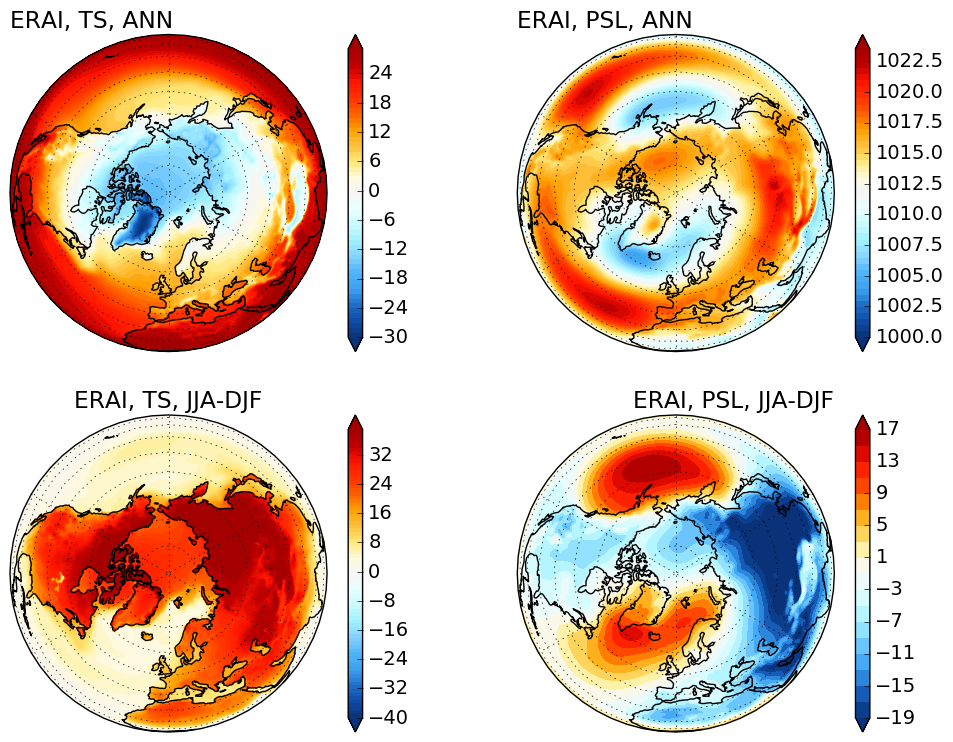

In [7]:
# Plot Orthographic projection
# Set number of rows and number of columns in subplot
nrows = 2; ncols = 2
# Set size of plot, and default font size
matplotlib.rcParams['figure.figsize']=(12,4.5*nrows)
matplotlib.rcParams.update({'font.size':14})

plot_test('Ortho',ncols,nrows)

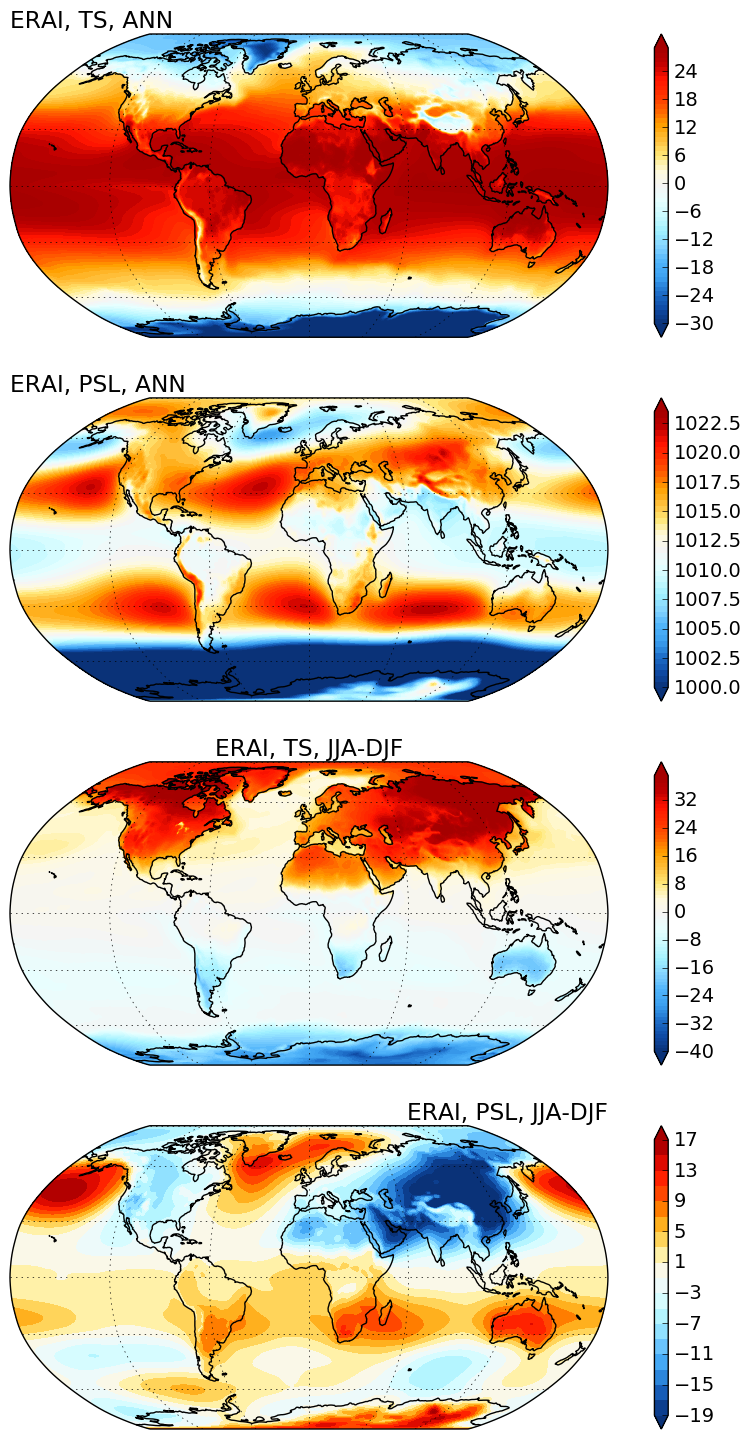

In [8]:
# Plot Robinson projection
nrows = 4; ncols = 1
# Set size of plot, and default font size
matplotlib.rcParams['figure.figsize']=(12,4.5*nrows)
matplotlib.rcParams.update({'font.size':14})

plot_test('Robinson',nrows,ncols)

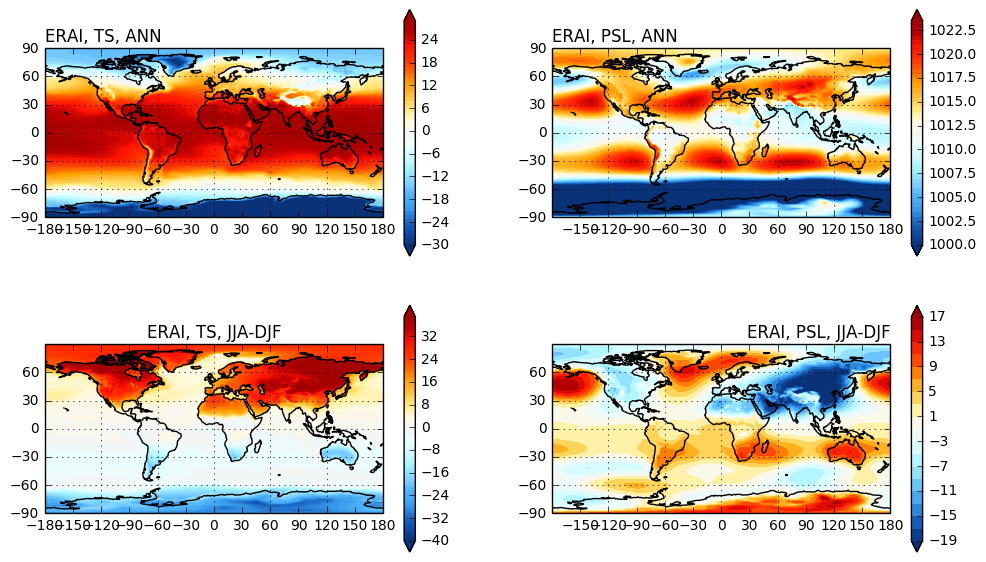

In [9]:
# Plot PlateCarree projection
nrows = 2; ncols = 2
# Set size of plot, and default font size
matplotlib.rcParams['figure.figsize']=(12,3.5*nrows)
matplotlib.rcParams.update({'font.size':10})

plot_test('PlateCarree',nrows,ncols)


In [10]:
## Limit lat-lon
# set plot size
matplotlib.rcParams['figure.figsize']=(20,5)
matplotlib.rcParams.update({'font.size':14})

# set number of subplots to 1,1
n=1; nrows = 1; ncols=1
# set projection:
proj='PlateCarree'
# set contour levels for coloured contours
levels0= np.arange(-30,30) #[-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19]
levelslabel0 = [-24,-18,-12,-6,0,6,12,18,24]
# Plot ERA-I
toplot = atmclim['ERAI']['ann']['skt'].mean(dim='time')  - 273.15
plot_map(proj,toplot,levels0,levelslabel0,n,nrows,ncols); n+=1

# limit plotting region
plt.xlim(-140,-80)
plt.ylim(20,65)
plt.show()

KeyError: 'ann'

In [ ]:
## Alternate limit lat-lon
# set plot size
matplotlib.rcParams['figure.figsize']=(20,5)
matplotlib.rcParams.update({'font.size':14})

# set number of subplots to 1,1
n=1; nrows = 1; ncols=1
# set projection:
proj='PlateCarree'
# set contour levels for coloured contours
levels0= np.arange(-30,30) #[-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19]
levelslabel0 = [-24,-18,-12,-6,0,6,12,18,24]
# Plot ERA-I
toplot = atmclim['ERAI']['ANN']['skt'].mean(dim='time')  - 273.15

# limit data that will be plotted 
# ERA-I file has latitudes from N to S, so need to slice from N to S
# ERA-I has longitudes from 0 to 360, so need to slice within these:
toplot = toplot.sel(latitude=slice(65,20),longitude=slice(220,280))
plot_map(proj,toplot,levels0,levelslabel0,n,nrows,ncols); n+=1
plt.show()

### Lambert plots

In [ ]:
matplotlib.rcParams['figure.figsize']=(20,7)
matplotlib.rcParams.update({'font.size':14})

fSST_exp = {}
fSST_exp['CTL'] = xrayOpen('/home/disk/rachel/CESM_outfiles/CESMtopof19/atm/hist/' + 
                 'DJF2_40_mean_CESMtopof19.cam2.h0.nc',False)

mask= np.where(fSST_exp['CTL'].LANDFRAC>0.9,1,np.nan)

# Select North America
temp = (mask * fSST_exp['CTL'].TS).sel(lat=slice(48,80),lon=slice(220,300))
    
BCtemp = temp.sel(lat = 50,method='nearest').sel(lon=239.0,method='nearest') 

print BCtemp
# Create a Lambert Conformal projection:
proj = ccrs.LambertConformal(central_longitude=-90.0, central_latitude=47.5,
                         false_easting=400000, false_northing=400000,
                         standard_parallels=(46, 49))

# Draw a set of axes with coastlines:
fig = plt.figure(figsize=(7, 4), frameon=True)
ax = fig.add_axes([0.08, 0.05, 0.8, 0.94], projection=proj)
ax.set_extent([-140, -50, 35, 60], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.add_feature(cf.BORDERS)

states_provinces = cf.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax.add_feature(states_provinces, edgecolor='gray')

# *must* call draw in order to get the axis boundary used to add ticks:
fig.canvas.draw()

# Define gridline locations and draw the lines using cartopy's built-in gridliner:
xticks = [-180,-160,-140,-120,-100,-80,-60,-40,-20]
yticks = [10,  20, 30, 40, 50, 60, 70, 80]
ax.gridlines(xlocs=xticks, ylocs=yticks)

# Label the end-points of the gridlines using the custom tick makers:
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
lambert_xticks(ax, xticks)
lambert_yticks(ax, yticks)


(mask * fSST_exp['CTL'].TS - BCtemp.values).mean(dim='time').plot(
    ax=ax,transform=ccrs.PlateCarree(),cmap=cmap_wc,vmax=12,vmin=-12,extend='both')

plt.xlabel('')
plt.ylabel('')
plt.show()
